DATA 506 Deliverable #2 - Summary analysis for food oder dataset

Name：Yuchen Song
Data Source： https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-datase

Description: This Dataset demonstrates an online food ordering / delivery App of New York Restaurants.I try to analyst this Dataset find some questions and some patterns by customers，then
help operation department think of some keys of enhancing customers experience.
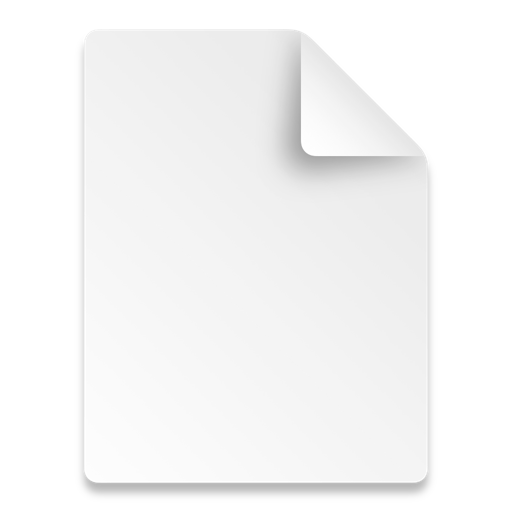

# Deliverable 2

In [3]:
import  pandas as pd
import numpy as np
import os
print(os.getcwd())
from matplotlib.pyplot import plot_date, figure


/Users/a1-6/Desktop/nyc-delivery


Step 1: Data overview

use read_csv method to pick up the dataset from folder and called df.

use head() to display the outline of dataset.
It's optional if you want print all rows just print df

use df.shape for print out how many rows and columns its have

use df.dtypes for print the every column's data type.


In [4]:
df = pd.read_csv("data/food_order.csv")
print("first 10 rows of data:")
print(df.head(10))
print("The shape of the dataframe is:")
print(df.shape)
print("The datatype of the dataframe is:")
print(df.dtypes)

first 10 rows of data:
   order_id  customer_id            restaurant_name   cuisine_type  \
0   1477147       337525                    Hangawi         Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   
8   1477174       121706         Anjappar Chettinad         Indian   
9   1477311        39705              Bukhara Grill         Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given           

Step 2:Data Schema Understanding

In [18]:
print("order_id: Unique Identifier for each order")
print("customer_id: Unique Identifier for each customer")
print("restaurant_id: Name of each restaurant who provided service")
print("cuisine_type: Food type of the restaurant provided")
print("cost_of_the_order: Total cost of the order(USD)")
print("day_of_the_order: Day of the order is weekend or weekday")
print("rating: Rate from customers(range：1-5)")
print("food_preparation_time： How long the food preparation takes（in minutes）")
print("delivery_time: How long time the customers can get the food (in minutes)")

order_id: Unique Identifier for each order
customer_id: Unique Identifier for each customer
restaurant_id: Name of each restaurant who provided service
cuisine_type: Food type of the restaurant provided
cost_of_the_order: Total cost of the order(USD)
day_of_the_order: Day of the order is weekend or weekday
rating: Rate from customers(range：1-5)
food_preparation_time： How long the food preparation takes（in minutes）
delivery_time: How long time the customers can get the food (in minutes)


Step 3 :abnormal values analysis

3.1.Missing values checking (use isnull().sum()

The 'rating' column contains a significant number of "Not given" values with 38.78% percentage

This will impact analysis of customer satisfaction



In [128]:
print(df.isnull().sum())
print("There is no traditional null values")
print("Try to find atypical null values：")

notgiven_count = (df["rating"] == "Not given").sum()
print(f"NO GIVEN RATING COUNT :{notgiven_count}")
total_rating = len((df["rating"]))
print(f"TOTAL RATING COUNT:{total_rating}")
ngr_percentage = (notgiven_count / total_rating) * 100
print(f"not given rating's percent :{ngr_percentage:.2f}%")


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
There is no traditional null values
Try to find atypical null values：
NO GIVEN RATING COUNT :736
TOTAL RATING COUNT:1898
not given rating's percent :38.78%


3.2 Others abnormal values checking

eliminated all the duplicate values and outliers, it was found that there were no duplicate values and no special outliers.

In [153]:
# repeated orders checking in this dataset
print(df.duplicated().sum())
# important columns' outlier values checking
print("The range of cost of orders：",df["cost_of_the_order"].min(),"-",df["cost_of_the_order"].max())
print("The range of food preparation time:",df["food_preparation_time"].min(),"-",df["food_preparation_time"].max())
print("The range of delivery time :",df["delivery_time"].min(),"-",df["delivery_time"].max())

# The outlier of cost of the orders checking
print("===The outlier of cost of the orders checking===")
print(df["cost_of_the_order"].describe())
low_cost= df[df["cost_of_the_order"]<=10]
print(f"The orders lower than 10$: {len(low_cost)}")
print(f"The orders lower than 10$'percentage: {len(low_cost)/len(df)*100:.2f}%")
print("===Detailed information of low-value orders===")
print(low_cost[['restaurant_name',"cuisine_type","cost_of_the_order"]].sort_values("cost_of_the_order",ascending=False).head(10))
print("Check the orders with a total amount lower than 10$. Most of these orders come from sushi bars/cafes/chain snacks shops.")



0
The range of cost of orders： 4.47 - 35.41
The range of food preparation time: 20 - 35
The range of delivery time : 15 - 33
===The outlier of cost of the orders checking===
count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64
The orders lower than 10$: 394
The orders lower than 10$'percentage: 20.76%
===Detailed information of low-value orders===
                restaurant_name    cuisine_type  cost_of_the_order
1588          Blue Ribbon Sushi        Japanese               9.85
354       Sushi of Gari Tribeca        Japanese               9.85
1253          Blue Ribbon Sushi        Japanese               9.75
513                 Cafe Habana         Mexican               9.75
709   Blue Ribbon Fried Chicken        American               9.75
1750                Han Dynasty         Chinese               9.75
1338               Hummus 

Step 4 :Unique values analysis

find all unique values with each column （use for loop and nunique（））

1.All order IDs are unique, as expected

2.Number of customers is less than number of orders, estimating  has repeat customers

3.Limited number of cuisine types, day_of_week,prepare to do categorical analysis


In [46]:
print("Number of unique values per column：")
for column in df.columns:
    unique_counts = df[column].nunique()
    print(f"Column {column} has {unique_counts} unique values")

print("The dataset shape is (1898,9)")


Number of unique values per column：
Column order_id has 1898 unique values
Column customer_id has 1200 unique values
Column restaurant_name has 178 unique values
Column cuisine_type has 14 unique values
Column cost_of_the_order has 312 unique values
Column day_of_the_week has 2 unique values
Column rating has 4 unique values
Column food_preparation_time has 16 unique values
Column delivery_time has 19 unique values
The dataset shape is (1898,9)


Step 5:Descriptive statistics analysis

select some numerical columns to do some Descriptive statistics analysis

Order cost: Average around 16.50 dollars, median around 14.14 dollars

Food preparation time: Average around 27 minutes, quite stable

Delivery time: Average around 24 minutes, good delivery efficiency

Valid ratings: Average around 4.34,  good rating（above 4） percentage is 83.8%，high customer satisfaction


In [92]:
select_columns =["cost_of_the_order","food_preparation_time","delivery_time"]
print(df[select_columns].describe().round(2))

# extract rating column which is numbers，removing not givens
rating2 = df[df["rating"] != "Not given"]
# extract new rating serie from rating2
rating_series = rating2["rating"]
# covert objects into numbers
valid_rating= pd.to_numeric(rating_series)
# use describe function to display
print(valid_rating.describe().round(2))

print(f"average rating: {valid_rating.mean():.2f}")
print(f"rating standard deviation: {valid_rating.std():.2f}")
print(f"good rating(above 4): {(valid_rating >= 4).mean():.1%}")

       cost_of_the_order  food_preparation_time  delivery_time
count            1898.00                1898.00        1898.00
mean               16.50                  27.37          24.16
std                 7.48                   4.63           4.97
min                 4.47                  20.00          15.00
25%                12.08                  23.00          20.00
50%                14.14                  27.00          25.00
75%                22.30                  31.00          28.00
max                35.41                  35.00          33.00
count    1162.00
mean        4.34
std         0.74
min         3.00
25%         4.00
50%         5.00
75%         5.00
max         5.00
Name: rating, dtype: float64
average rating: 4.34
rating standard deviation: 0.74
good rating(above 4): 83.8%


Step 6： categorical statistics analysis

6.1 use value_counts function to analyst distribution of cuisine type column

American Japanese Italian Chinese and Mexican cuisines are the TOP 5 popular food in this list

In [82]:
print("Cuisine type distribution: ")
cuisine_counts = df["cuisine_type"].value_counts()
cuisine_percentage = df["cuisine_type"].value_counts(normalize=True) *100
cuisine_stats = pd.DataFrame({"cuisine_counts":cuisine_counts,"cuisine_percentage":cuisine_percentage.round(2).astype(str)+"%"})
cuisine_stats["Rank"] = range(1,len(cuisine_stats)+1)
print(cuisine_stats)

Cuisine type distribution: 
                cuisine_counts cuisine_percentage  Rank
cuisine_type                                           
American                   584             30.77%     1
Japanese                   470             24.76%     2
Italian                    298              15.7%     3
Chinese                    215             11.33%     4
Mexican                     77              4.06%     5
Indian                      73              3.85%     6
Middle Eastern              49              2.58%     7
Mediterranean               46              2.42%     8
Thai                        19               1.0%     9
French                      18              0.95%    10
Southern                    17               0.9%    11
Korean                      13              0.68%    12
Spanish                     12              0.63%    13
Vietnamese                   7              0.37%    14


6.2 use value_counts function to analyst distribution of day of week columns

almost 43%  more orders on weekends compared to weekdays

In [86]:
print("Day of the week distribution: ")
days_counts = df[("day_of_the_week")].value_counts()
days_percentage = df[("day_of_the_week")].value_counts(normalize=True)*100
days_stats = pd.DataFrame({"orders":days_counts,"percentage":days_percentage.round(2).astype(str)+"%"})
print(days_stats)

Day of the week distribution: 
                 orders percentage
day_of_the_week                   
Weekend            1351     71.18%
Weekday             547     28.82%


6.3 use value_counts function to analyst distribution of restaurants columns

Shake Shack and The Meatball Shop are the most frequently ordered restaurants

In [90]:
print("restaurant distribution: ")
restaurant_counts = df["restaurant_name"].value_counts()
restaurant_percentage = df["restaurant_name"].value_counts(normalize=True)*100
restaurant_stats = pd.DataFrame({"Name：":restaurant_counts,"Percentage":restaurant_percentage.round(2).astype(str)+"%"})
restaurant_stats["Rank"] = range(1,len(restaurant_stats)+1)
print(restaurant_stats)

restaurant distribution: 
                           Name： Percentage  Rank
restaurant_name                                  
Shake Shack                  219     11.54%     1
The Meatball Shop            132      6.95%     2
Blue Ribbon Sushi            119      6.27%     3
Blue Ribbon Fried Chicken     96      5.06%     4
Parm                          68      3.58%     5
...                          ...        ...   ...
Sushi Choshi                   1      0.05%   174
Dos Caminos Soho               1      0.05%   175
La Follia                      1      0.05%   176
Philippe Chow                  1      0.05%   177
'wichcraft                     1      0.05%   178

[178 rows x 3 columns]


Step 7:Numerical columns Analysis

7.1. Cuisine Type vs Food Preparation Time Relationship

The top 5 longest average prep time food are:Southern,Chiese,Japanese,Italian,American

In [102]:
cuisine_prep_time = df.groupby("cuisine_type")["food_preparation_time"].agg(["count", "mean", "median", "std", "min", "max"]).round(2)
print("each cuisine preparation time is:")
print(cuisine_prep_time.sort_values(by="mean", ascending=False))

each cuisine preparation time is:
                count   mean  median   std  min  max
cuisine_type                                        
Southern           17  27.59    26.0  5.52   20   35
Chinese           215  27.51    27.0  4.76   20   35
Japanese          470  27.51    27.5  4.60   20   35
Italian           298  27.48    28.0  4.52   20   35
American          584  27.44    27.0  4.66   20   35
Thai               19  27.32    28.0  5.50   21   35
Indian             73  27.11    27.0  4.62   20   35
Mediterranean      46  27.00    27.0  4.91   20   35
Spanish            12  26.92    27.5  4.50   20   35
French             18  26.89    25.5  5.04   21   35
Mexican            77  26.73    26.0  4.60   20   35
Middle Eastern     49  26.67    27.0  4.01   20   34
Vietnamese          7  25.71    25.0  5.15   20   33
Korean             13  25.46    25.0  3.97   20   33


7.2.Food Preparation Time vs Rating Relationship

exclude rows where rating is "Not given".

Convert the rating column to integer.

Group by rating and  food preparation time.


In [126]:
# exclude "Not given" ratings and convert to numeric
rating_analysis = df[df["rating"] !="Not given"].copy()
rating_analysis["rating"] = rating_analysis["rating"].astype(int)

# Basic statistics by rating
print("===Average rating by food preparation time===")
rating_by_prep_time = rating_analysis.groupby("rating")["food_preparation_time"].agg(["count", "mean", "median", "std"]).round(2)
print(rating_by_prep_time.sort_values(by="mean", ascending=False))

# Calculate correlation of Food Preparation Time and Rating
corr_analysis = rating_analysis["food_preparation_time"].corr(rating_analysis["rating"])
print(f"Correlation between preparation time and rating: {corr_analysis:.2f}")

# Key insight
print("===NEGLIGIBLE CORRELATION: Preparation time has almost no relationship with  ratings===")
print("   • Correlation coefficient: -0.01 (extremely weak negative correlation)")



===Average rating by food preparation time===
        count   mean  median   std
rating                            
3         188  27.43    27.0  4.77
4         386  27.40    27.0  4.62
5         588  27.36    27.5  4.69
Correlation between preparation time and rating: -0.01
===NEGLIGIBLE CORRELATION: Preparation time has almost no relationship with  ratings===
   • Correlation coefficient: -0.01 (extremely weak negative correlation)


Summary

Business insights

1. Overall Data Quality

By looking at the dataset's overall structure and each column, we judge that this dataset is relatively complete and has value to analysis.

2. Missing Rating Problem

We found no technical outliers. However, 38.78% of guests did not give a rating ("Not given"). This high percentage affects the quality of our overall analysis. We suggest the APP launch rating incentive policies in the future to encourage users to rate, in order to get more complete data

3. Top 5 Most Popular Cuisine Types

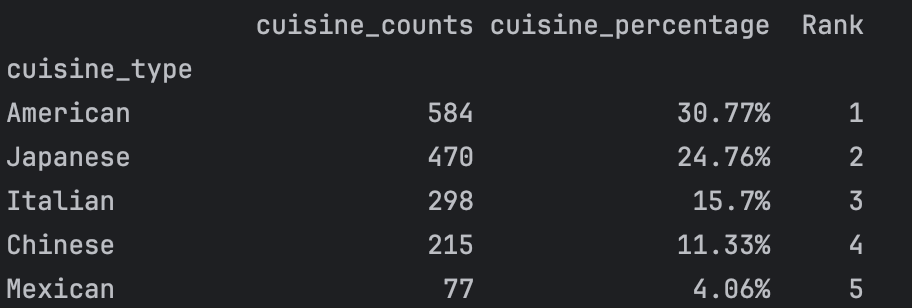


4. Basic Descriptive Statistics


Order cost: Average around 16.50 dollars, median around 14.14 dollars

Food preparation time: Average around 27 minutes, quite stable

Delivery time: Average around 24 minutes, good delivery efficiency

Valid ratings: Average around 4.34,  good rating（above 4） percentage is 83.8%，high customer satisfaction

5.Order Distribution（weekend vs weekday）：

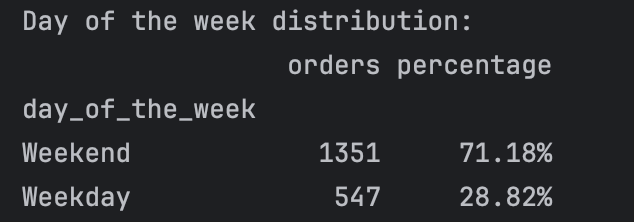

71.18% of orders come from weekends.

28.82% of orders come from weekdays.

This shows the app's user base is not mainly office workers. We recommend launching promotional activities on weekdays to attract new customers and activate existing ones, increasing weekday order rates. Also, on weekends, increase promotion and delivery fees for riders to get more riders to accept orders, improving delivery speed and ensuring customer satisfaction during the weekend peak

6. Most Popular Restaurant Analysis

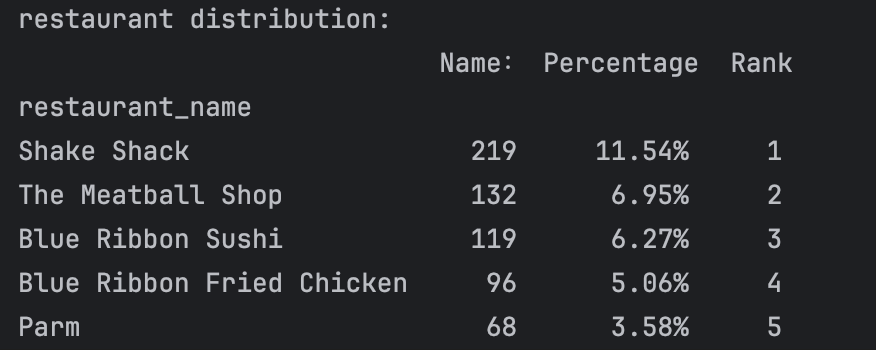

The top five restaurants by order count are mostly fast-food chains. This clarifies our user profile: they prefer high-quality, fast-prepared, low-cost food, with taste being a secondary need. We can have relevant departments establish more partnerships with fast-food chain restaurants to deepen our advantage.

# Deliverable 3

step 1： create a copy dataset with some problems

In [8]:
# copy from original dataset
df_with_issues = df.copy()

# 1.add duplicate rows
duplicate_records = df_with_issues.iloc[[0,1]]
df_with_issues = pd.concat([df_with_issues, duplicate_records],ignore_index=True)
print("Add two duplicate records")


# 2.Add outlier values
df_with_issues.loc[5,"cost_of_the_order"] = -10
df_with_issues.loc[7,"rating"] = 10
df_with_issues.loc[11,"food_preparation_time"] = 2
print("Add three outliers values")

# 3.Add missing values
df_with_issues.loc[[12,14,17],"rating"] = np.nan
df_with_issues.loc[[56,78,556],"delivery_time"] = np.nan
print('Add six missing values')

print("New dataset's shape:",df_with_issues.shape)
print(df_with_issues)

# Save the new dataset
df_with_issues.to_csv("data/modified_food_order.csv")


Add two duplicate records
Add three outliers values
Add six missing values
New dataset's shape: (1900, 9)
      order_id  customer_id            restaurant_name   cuisine_type  \
0      1477147       337525                    Hangawi         Korean   
1      1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2      1477070        66393                Cafe Habana        Mexican   
3      1477334       106968  Blue Ribbon Fried Chicken       American   
4      1478249        76942           Dirty Bird to Go       American   
...        ...          ...                        ...            ...   
1895   1477819        35309          Blue Ribbon Sushi       Japanese   
1896   1477513        64151          Jack's Wife Freda  Mediterranean   
1897   1478056       120353          Blue Ribbon Sushi       Japanese   
1898   1477147       337525                    Hangawi         Korean   
1899   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   

      cost_of_the

STEP 2: DATA CLEANING

In [9]:
df_cleaned = df_with_issues.copy()

# Remove duplicated records
print("How many duplicated rows its have before:",df_with_issues.duplicated().sum())
df_cleaned = df_cleaned.drop_duplicates()
print("After dropping duplicate records:",df_cleaned.duplicated().sum())


How many duplicated rows its have before: 2
After dropping duplicate records: 0


In [10]:
# Find out outlier values and handle them
#check all numerical columns and turn objects（Not given) to numeric
df_cleaned["rating"] = df_cleaned["rating"].replace("Not given",np.nan)
df_cleaned["rating"] = pd.to_numeric(df_cleaned["rating"])
print(df_cleaned[["cost_of_the_order","food_preparation_time","delivery_time","rating"]].describe())

# Now we became familiar with these numbers range,then find out outliers one by one
bad_cost = (df_cleaned["cost_of_the_order"]>100) | (df_cleaned["cost_of_the_order"] <5)
print("Found cost outliers:",bad_cost.sum())
bad_food_pre_time= (df_cleaned["food_preparation_time"]>60) | (df_cleaned["food_preparation_time"]<5)
print("Found food preparation time outliers:",bad_food_pre_time.sum())
bad_delivery_time = (df_cleaned["delivery_time"]>60) | (df_cleaned["delivery_time"]<5)
print("Found delivery time outliers:",bad_delivery_time.sum())
bad_rating = (df_cleaned["rating"]>5) | (df_cleaned["rating"]<0)
print("Found rating outliers:",bad_rating.sum())


       cost_of_the_order  food_preparation_time  delivery_time       rating
count        1898.000000            1898.000000    1895.000000  1161.000000
mean           16.480295              27.360906      24.163588     4.349699
std             7.505809               4.667872       4.970307     0.758868
min           -10.000000               2.000000      15.000000     3.000000
25%            12.080000              23.000000      20.000000     4.000000
50%            14.120000              27.000000      25.000000     5.000000
75%            22.260000              31.000000      28.000000     5.000000
max            35.410000              35.000000      33.000000    10.000000
Found cost outliers: 10
Found food preparation time outliers: 1
Found delivery time outliers: 0
Found rating outliers: 1


In [11]:
# Now we can replace the outliers by means or medians
mean_cost = df_cleaned["cost_of_the_order"].mean()
df_cleaned.loc[bad_cost,"cost_of_the_order"] =mean_cost
mean_food_pre_time = df_cleaned["food_preparation_time"].mean()
df_cleaned.loc[bad_food_pre_time,"food_preparation_time"] =mean_food_pre_time
mean_rating = df_cleaned["rating"].mean()
df_cleaned.loc[bad_rating,"rating"] =mean_rating

/var/folders/0l/53j7_yw55yg0vrbptd2ssjdc0000gn/T/ipykernel_12833/4222779689.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.3609062170706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[bad_food_pre_time,"food_preparation_time"] =mean_food_pre_time


step 3 ：Handle Missing Values

In [12]:
# Check missing values
print("The missing values it have before:")
print(df_cleaned.isnull().sum())

The missing values it have before:
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   737
food_preparation_time      0
delivery_time              3
dtype: int64


In [13]:
# Fill rating missing values with rating mean
df_cleaned["rating"]= df_cleaned["rating"].fillna(df_cleaned["rating"].mean())
# Fill delivery time  missing values with  median
df_cleaned["delivery_time"]=df_cleaned["delivery_time"].fillna(df_cleaned["delivery_time"].median())
print("The missing values it have after:")
print(df_cleaned.isnull().sum())


The missing values it have after:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


Step 4. Save the cleaned data

In [14]:
df_cleaned.to_csv("data/cleaned_food_order.csv")
print("the data shape after cleaning:",df_cleaned.shape)
print("the data duplicates after cleaning:",df_cleaned.duplicated().sum())
print("the missing values after cleaning:",df_cleaned.isnull().sum())

the data shape after cleaning: (1898, 9)
the data duplicates after cleaning: 0
the missing values after cleaning: order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


# Deliverable 4
in this part，I create some Data visualizations for food delivery business prospective analysis.
i
i

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_food_order.csv")
df.head(10)

,Unnamed: 0,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,0,1477147,337525,Hangawi,Korean,30.750000,Weekend,4.344832,25.0,20.0
1,1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080000,Weekend,4.344832,25.0,23.0
2,2,1477070,66393,Cafe Habana,Mexican,12.230000,Weekday,5.000000,23.0,28.0
3,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200000,Weekend,3.000000,25.0,15.0
4,4,1478249,76942,Dirty Bird to Go,American,11.590000,Weekday,4.000000,25.0,24.0
5,5,1477224,147468,Tamarind TriBeCa,Indian,16.480295,Weekday,3.000000,20.0,24.0
6,6,1477894,157711,The Meatball Shop,Italian,6.070000,Weekend,4.344832,28.0,21.0
7,7,1477859,89574,Barbounia,Mediterranean,5.970000,Weekday,4.349699,33.0,30.0
8,8,1477174,121706,Anjappar Chettinad,Indian,16.440000,Weekday,5.000000,21.0,26.0
9,9,1477311,39705,Bukhara Grill,Indian,7.180000,Weekday,5.000000,29.0,26.0


plot 1: average cost of the orders distribution(Histogram)

this plot shows order values clearly：which value range is highest which one is outlier.we can see the range of
10-20$ is the most mainly orders.and also the range of 20-35$  is our important part to reach the turn-over.Understanding the sales distribution will help business department to design some useful promotions.

Text(0.5, 1.0, 'Cost of Order Distribution')

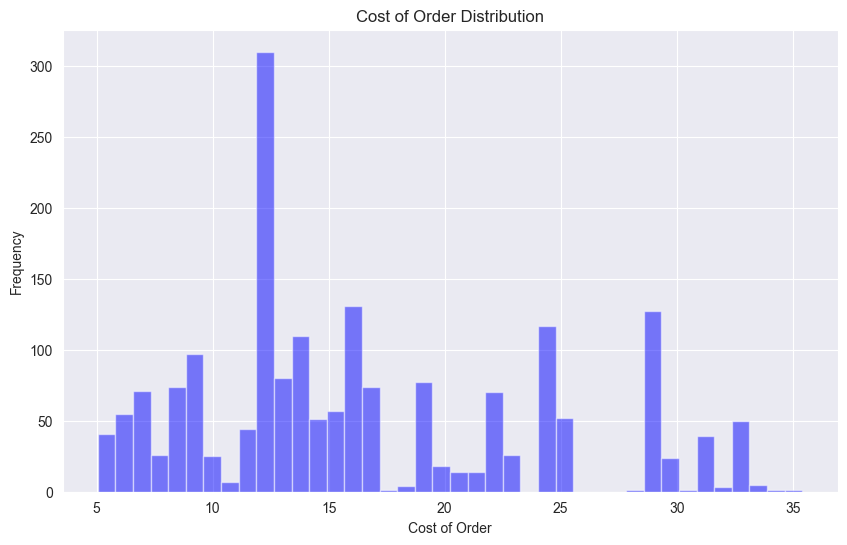

In [16]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot()
ax.hist(df["cost_of_the_order"],bins=40,color="blue",alpha=.5)
ax.set_xlabel("Cost of Order")
ax.set_ylabel("Frequency")
ax.set_title("Cost of Order Distribution")

plot 2 : Distribution of preparation time and rating、cuisine type（ Three Boxplots）

Observing  relationship of the three columns，try to find out the rating whether impact by preparation time.and cuisine type whether affect preparation time.It will help marketing department  launch  some specific promotion kind of like some waiting cupons to comfort customers or not.

/var/folders/0l/53j7_yw55yg0vrbptd2ssjdc0000gn/T/ipykernel_12833/1966028415.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prep_time_groups, labels=rating_levels, showfliers=True)


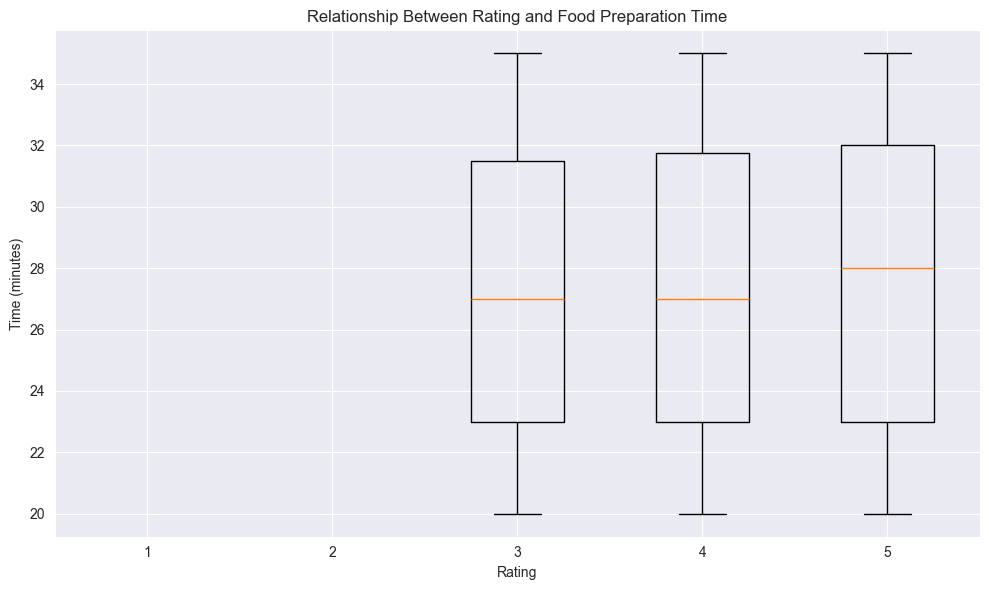

In [17]:
df['numeric_rating'] = pd.to_numeric(df['rating'], errors='coerce')
rating_levels = [1, 2, 3, 4, 5]
prep_time_groups = [df[df['numeric_rating'] == r]['food_preparation_time'] for r in rating_levels]

plt.figure(figsize=(10,6))
plt.boxplot(prep_time_groups, labels=rating_levels, showfliers=True)
plt.xlabel("Rating")
plt.ylabel("Time (minutes)")
plt.title("Relationship Between Rating and Food Preparation Time")

plt.tight_layout()
plt.show()

/var/folders/0l/53j7_yw55yg0vrbptd2ssjdc0000gn/T/ipykernel_12833/842602612.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prep_time, labels=all_cuisines, showfliers=True)


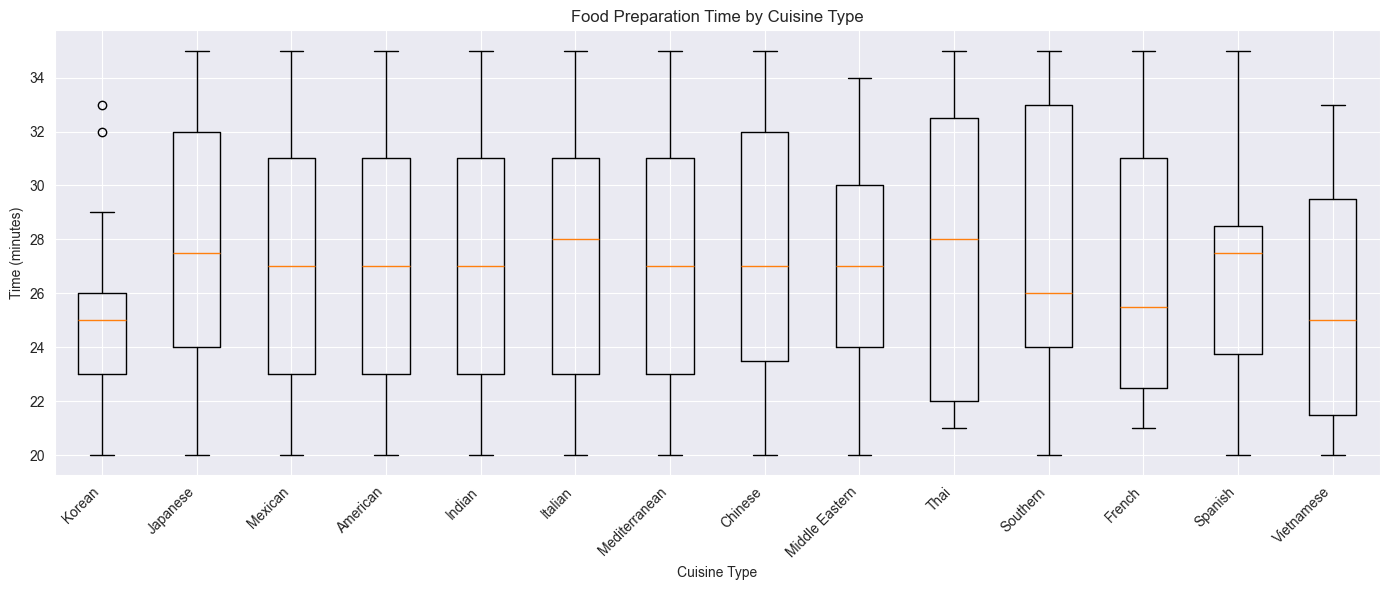

In [19]:

all_cuisines = df['cuisine_type'].unique()

prep_time= [df[df['cuisine_type'] == c]['food_preparation_time']for c in all_cuisines]

plt.figure(figsize=(14, 6))
plt.boxplot(prep_time, labels=all_cuisines, showfliers=True)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Time (minutes)")
plt.xlabel("Cuisine Type")
plt.title("Food Preparation Time by Cuisine Type")

plt.tight_layout()
plt.show()

/var/folders/0l/53j7_yw55yg0vrbptd2ssjdc0000gn/T/ipykernel_12833/1793572281.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ratings_by_cuisine, labels=all_cuisines, showfliers=True)


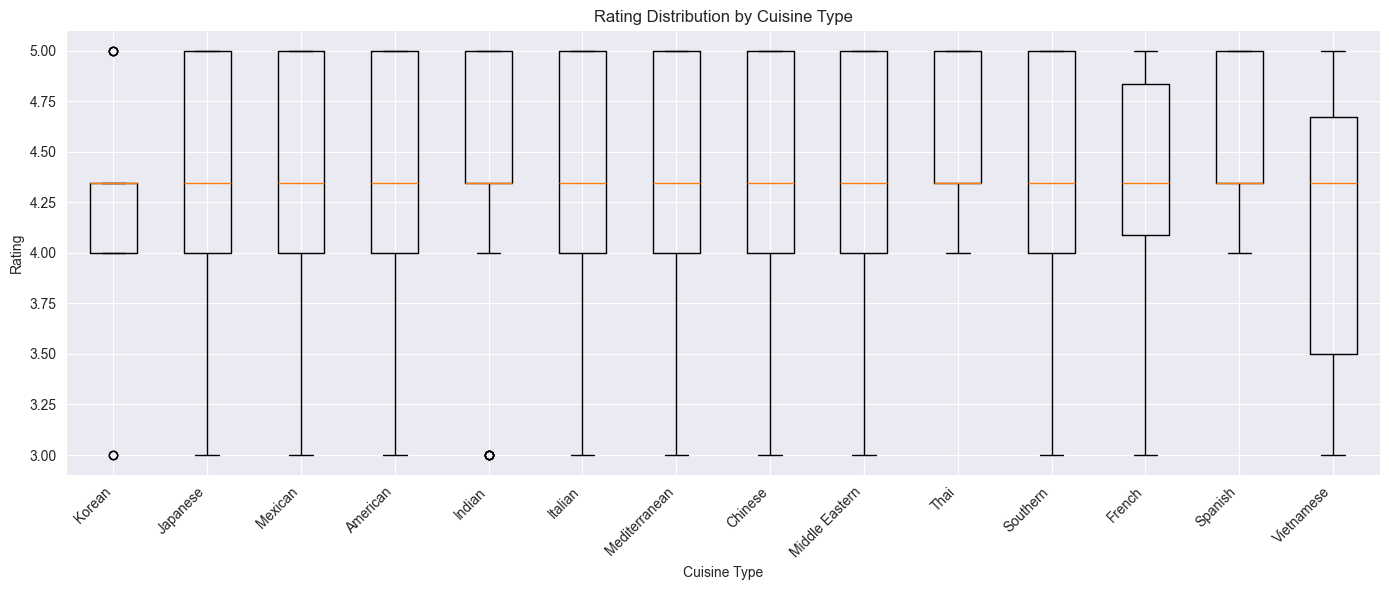

In [20]:

ratings_by_cuisine = [df[df['cuisine_type'] == c]['numeric_rating'].dropna()for c in all_cuisines]


plt.figure(figsize=(14, 6))
plt.boxplot(ratings_by_cuisine, labels=all_cuisines, showfliers=True)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Rating")
plt.xlabel("Cuisine Type")
plt.title("Rating Distribution by Cuisine Type")

plt.tight_layout()
plt.show()

Insight:The boxplot comparing rating distributions across cuisine types shows that customer satisfaction is generally high and consistent across all cuisines. There is no strong correlation between customer ratings and the time taken for food preparation.The operation department should focus on the individualized supervision of the restaurant.

Plot 3 ：Preparation Time vs Delivery Time（Scatter Plot）

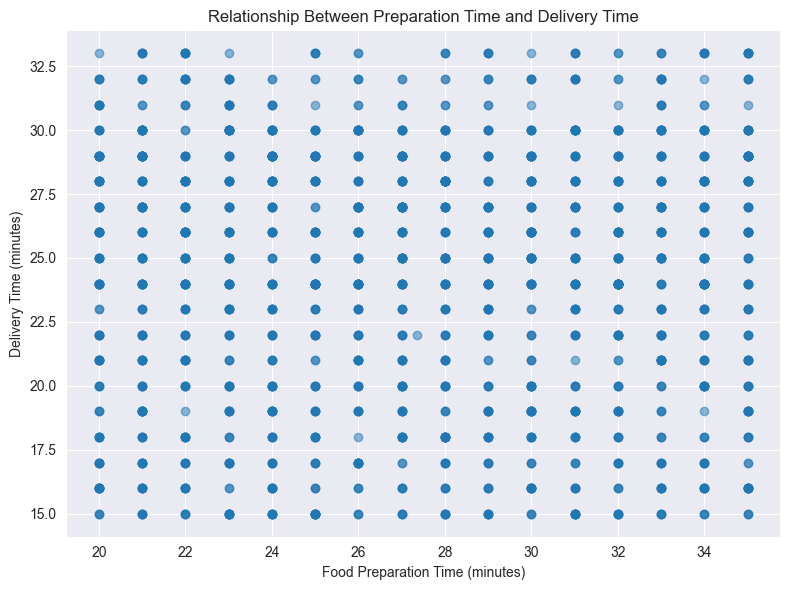

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df['food_preparation_time'], df['delivery_time'], alpha=0.5)

plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Relationship Between Preparation Time and Delivery Time")

plt.grid(True)
plt.tight_layout()
plt.show()

Insignt：The points are widely spread, indicating that preparation time and delivery time are not strongly correlated. A long preparation time does not necessarily lead to a long delivery time.Restaurants with consistently long preparation time should be reviewed separately from delivery issues.

Plot 4 ： The Ranking of orders by cuisine type（Bar plot）

Let's briefly examine the sales situation of various cuisines in this area.

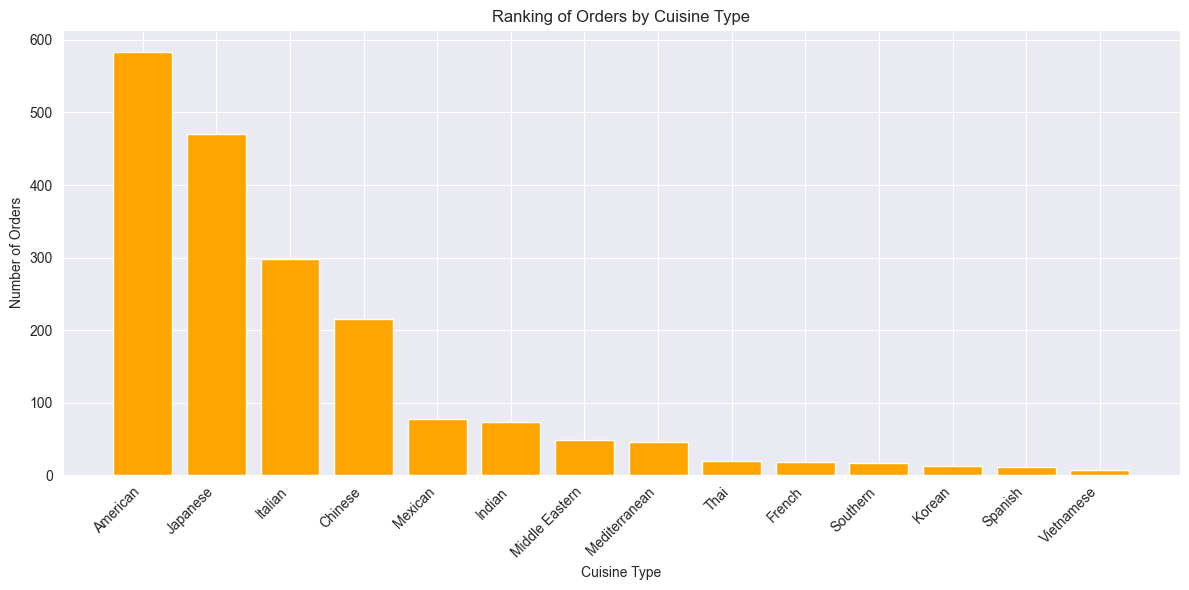

In [22]:
cuisine_counts = df['cuisine_type'].value_counts().sort_values(ascending=False)

# Plot ranking
plt.figure(figsize=(12,6))
plt.bar(cuisine_counts.index, cuisine_counts.values, color="orange")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.title("Ranking of Orders by Cuisine Type")
plt.tight_layout()
plt.show()

Plot 5：daily orders vs，weekend orders

By comparing the daily order volume with the Sunday order volume, the target group can be initially identified.

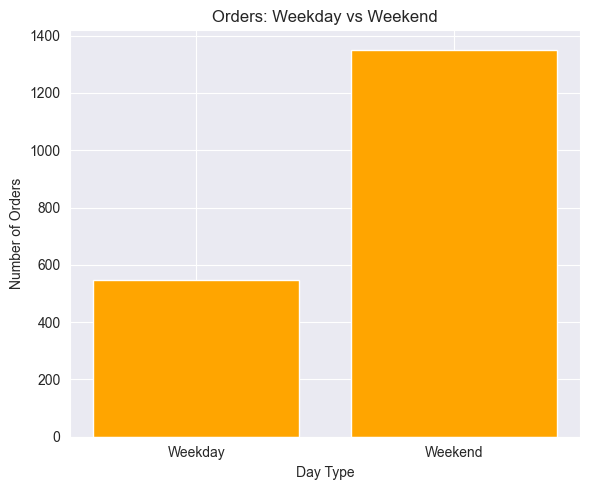

In [54]:
order_counts = df['day_of_the_week'].value_counts().reindex(['Weekday','Weekend'])

# Plot bar chart (histogram-like comparison)
plt.figure(figsize=(6,5))
plt.bar(order_counts.index, order_counts.values, color="orange")

plt.xlabel("Day Type")
plt.ylabel("Number of Orders")
plt.title("Orders: Weekday vs Weekend")
plt.tight_layout()
plt.show()

Insight：This histogram shows a clear comparison between weekday and weekend orders. The weekend bar is significantly higher than the weekday bar, This suggests strong weekend demand patterns, likely driven by family meals, social activities, or customers staying at home.

# Deliverable V –Group Operations

In [25]:
df['numeric_rating'] = pd.to_numeric(df['rating'], errors='coerce')

summary_by_cuisine = df.groupby('cuisine_type')[['cost_of_the_order',
                                                 'food_preparation_time',
                                                 'numeric_rating']].mean()

summary_by_cuisine

,cost_of_the_order,food_preparation_time,numeric_rating
cuisine_type,,,
American,16.380070,27.440068,4.314775
Chinese,16.359769,27.511628,4.340820
French,19.793889,26.888889,4.319925
Indian,16.800004,27.109589,4.478509
Italian,16.418691,27.483221,4.353855
Japanese,16.404620,27.510638,4.361557
Korean,14.001538,25.461538,4.183025
Mediterranean,15.474783,27.000000,4.286464
Mexican,17.084160,26.783908,4.389612


This technique provides a clear and efficient way to compare categories and helps the business team identify which cuisine types contribute most to revenue, preparation complexity, and customer satisfaction.

餐厅平均准备时间排行（Bar Chart）

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(restaurant_prep, bins=20)
plt.title("Histogram of Restaurants' Average Preparation Times")
plt.xlabel("Average Prep Time")
plt.ylabel("Restaurant Count")
plt.show()

NameError: name 'restaurant_prep' is not defined

<Figure size 800x500 with 0 Axes>

 餐厅评分 vs 订单量 Scatter Plot

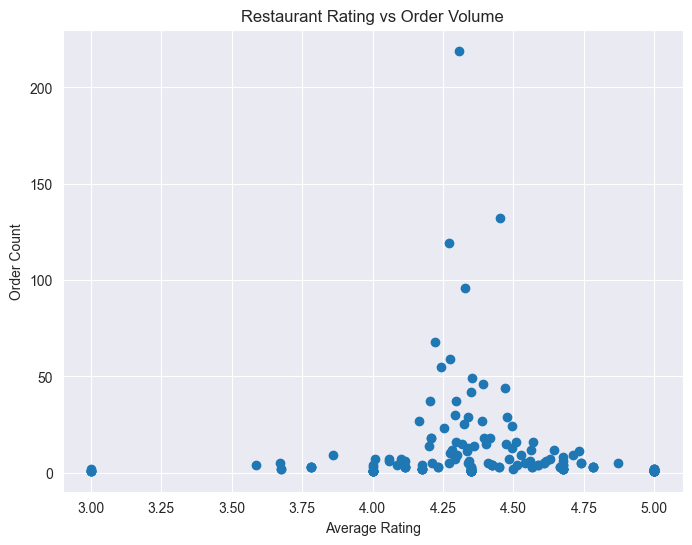

In [51]:
# 计算每个餐厅的评分均值和订单量
restaurant_stats = df.groupby("restaurant_name").agg(
    avg_rating=("rating", "mean"),
    order_count=("order_id", "count")
).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(restaurant_stats["avg_rating"], restaurant_stats["order_count"])
plt.title("Restaurant Rating vs Order Volume")
plt.xlabel("Average Rating")
plt.ylabel("Order Count")
plt.grid(True)
plt.show()

周中 vs 周末 平均配送时间折线图

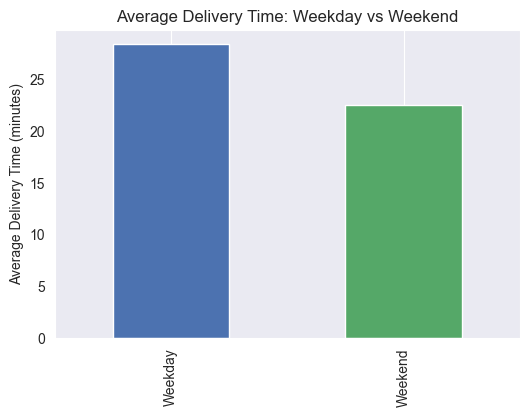

In [62]:
weekday_delivery = (df.groupby("day_of_the_week")["delivery_time"] .mean().reindex(["Weekday", "Weekend"]))

plt.figure(figsize=(6,4))
weekday_delivery.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Delivery Time: Weekday vs Weekend")
plt.ylabel("Average Delivery Time (minutes)")
plt.xlabel("")
plt.grid(axis='y')
plt.show()

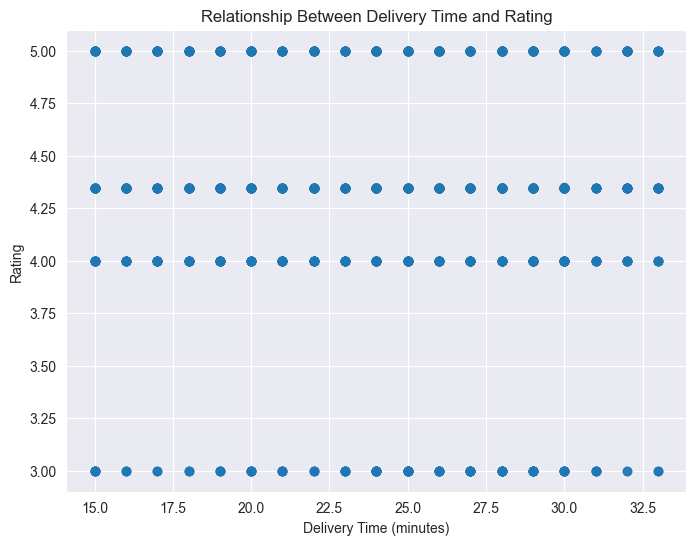

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df["delivery_time"], df["rating"], alpha=0.6)

plt.title("Relationship Between Delivery Time and Rating")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Rating")
plt.grid(True)

plt.show()